<a href="https://colab.research.google.com/github/Simurgh818/BMED_6517_emotional_state_classifier/blob/main/DEAP_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing our git repo
import os
if not os.path.exists('/content/BMED_6517_emotional_state_classifier'):
  !wget https://github.com/Simurgh818/BMED_6517_emotional_state_classifier/blob/main/requirements.txt -q --show-progress --progress=dot
  !git clone https://github.com/Simurgh818/BMED_6517_emotional_state_classifier.git


     0K .......... .......... .......... .......... .......... 3.06M
    50K .......... .......... .......... .......... .......... 6.41M
   100K .......... .......... .......... .......... .......... 58.8M
   150K .......... .......... ..                               61.5M=0.02sCloning into 'BMED_6517_emotional_state_classifier'...
remote: Enumerating objects: 145, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 145 (delta 10), reused 12 (delta 1), pack-reused 114
Receiving objects: 100% (145/145), 78.59 MiB | 18.79 MiB/s, done.
Resolving deltas: 100% (54/54), done.
Checking out files: 100% (25/25), done.


In [ ]:
# Importing the preprocessed dataset files
!wget https://drive.google.com/drive/folders/1_9n-kRKkpnCC2wVovOJsIXOyY3BeW1TB?usp=sharing

--2022-12-05 15:28:48--  https://drive.google.com/drive/folders/1_9n-kRKkpnCC2wVovOJsIXOyY3BeW1TB?usp=sharing
Resolving drive.google.com (drive.google.com)... 74.125.142.139, 74.125.142.113, 74.125.142.138, ...
Connecting to drive.google.com (drive.google.com)|74.125.142.139|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘1_9n-kRKkpnCC2wVovOJsIXOyY3BeW1TB?usp=sharing’

1_9n-kRKkpnCC2wVovO     [  <=>               ] 220.95K  1012KB/s    in 0.2s    

2022-12-05 15:28:48 (1012 KB/s) - ‘1_9n-kRKkpnCC2wVovOJsIXOyY3BeW1TB?usp=sharing’ saved [226251]



In [ ]:
# import data from numpy arrays
import numpy as np

loaded_features = np.load('/content/BMED_6517_emotional_state_classifier/results/npy/EEG_features.npy', allow_pickle=True)

connectivityMatrix = loaded_features.item().get('connectivity_matrix')
connectivityLinear = loaded_features.item().get('connectivity_linear')
wavelet = loaded_features.item().get('waveletEntropy')
Valence = loaded_features.item().get('Valence')
Arousal = loaded_features.item().get('Arousal')
Classes = loaded_features.item().get('Classes')

print(connectivityMatrix.shape)
print(connectivityLinear.shape)
print(wavelet.shape)
print(Valence.shape)
print(Arousal.shape)
print(Classes.shape)

(880, 5, 32, 32)
(880, 5, 512)
(880, 32, 6)
(880,)
(880,)
(880,)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import tensorflow as tf

# Importing Deep Learning Libraries
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#from google.colab import files
#uploaded = files.upload()
#dataset_labels = np.load('content/gdrive/MyDrive/Colab Notebooks/Copy of labels_1_22.npy', mmap_mode='r')

In [ ]:
#dataset_name1 = 'Copy of bipolar_feats.npy'

#dataset_bipolarfts = np.load(dataset_name1, encoding='bytes')

In [ ]:
#dataset_name2 = 'Copy of labels_1_22.npy'

#dataset_labels = np.load(dataset_name2, encoding='bytes')

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import load_iris

In [ ]:
# Algorithm 1 for Convolutional Neural Model :
##Require: Training EEG Dataset nntrX, Training Valence/Arousal Values nntrY, Testing subject’s EEG
#Dataset nnteX, Testing Valence/Arousal Values nnteY
# cnn = model(trainX, trainY )

#x = dataset_bipolarfts
x = connectivityMatrix
#y = dataset_labels[1:881]
y = np.vstack([Valence,Arousal]).T
#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
y[np.where(y<4.5)] = 0
y[np.where(y>=4.5)] = 1
y_4_class = y[:,0]*2+y[:,1]
print(np.unique(y_4_class))
print(y_4_class.shape)
y_one_hot = np.zeros((y.shape[0],4))
y_one_hot[np.where(y_4_class==0),0] = 1
y_one_hot[np.where(y_4_class==1),1] = 1
y_one_hot[np.where(y_4_class==2),2] = 1
y_one_hot[np.where(y_4_class==3),3] = 1
print(np.unique(y_one_hot))
print(y_one_hot.shape)
print(np.sum(y_one_hot,axis=0))

[0. 1. 2. 3.]
(880,)
[0. 1.]
(880, 4)
[128. 206. 186. 360.]


In [ ]:
y_test = y_one_hot[:4*40,:]
x_test = x[:4*40,:,:,:]
y_train = y_one_hot[4*40:,:]
x_train = x[4*40:,:,:,:]
print(x_test.shape)
print(x_train.shape)
print(y_train.shape)

(160, 5, 32, 32)
(720, 5, 32, 32)
(720, 4)


In [ ]:
import keras
from keras import optimizers
from keras.layers import Input, Dense, Flatten, Dropout, Conv2D, MaxPooling2D, Activation, concatenate
from keras.callbacks import ModelCheckpoint
from keras.metrics import CategoricalAccuracy,CategoricalCrossentropy,Precision,Recall

In [ ]:
from keras.layers.activation.relu import ReLU

def make_CNN_layers(input_mat):
  # layer 1
  model = Conv2D(16,(3,3),padding='same',input_shape=input_shape)(input_mat)
  model = ReLU()(model)
  model = MaxPooling2D((2,2),padding='same')(model)
  model = Dropout(0.2)(model)

  # layer 2
  model = Conv2D(32,(3,3),padding='same')(model)
  model = ReLU()(model)
  model = MaxPooling2D((2,2),padding='same')(model)
  model = Dropout(0.2)(model)

  #layer 3
  model = Conv2D(64,(3,3),padding='same')(model)
  model = ReLU()(model)
  model = MaxPooling2D((2,2),padding='same')(model)
  model = Dropout(0.5)(model)

  return model

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
input_shape = x_test[0,0].shape
input_shape = (32,32,1)
delta_input = Input(shape = input_shape)
delta_model = make_CNN_layers(delta_input)

theta_input = Input(shape = input_shape)
theta_model = make_CNN_layers(theta_input)

alpha_input = Input(shape = input_shape)
alpha_model = make_CNN_layers(alpha_input)

beta_input = Input(shape = input_shape)
beta_model = make_CNN_layers(beta_input)

gamma_input = Input(shape = input_shape)
gamma_model = make_CNN_layers(gamma_input)

conv = concatenate([delta_model,theta_model,alpha_model,beta_model,gamma_model])

conv = Flatten()(conv)

dense = Dense(512)(conv)
dense = ReLU()(dense)
dense = Dropout(0.5)(dense)

output = Dense(4,activation='softmax')(dense)

model = Model(inputs=[delta_input,theta_input,alpha_input,beta_input,gamma_input],
              outputs=[output])

# opt = optimizers.SGD()

# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              #loss=tf.keras.losses.BinaryCrossentropy(),
              #metrics=[tf.keras.metrics.BinaryAccuracy(),
                       #tf.keras.metrics.FalseNegatives()])
          


# lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    #initial_learning_rate=1e-4,
    #decay_steps=10000,
    #decay_rate=0.96,
    #staircase = True)

# opt = keras.optimizers.SGD(lr=0.01, decay=1e-4, momentum=0.6, nesterov=True)
opt = keras.optimizers.SGD(learning_rate= 1e-3)

model.compile(loss='categorical_crossentropy',optimizer= opt ,metrics=['acc',Recall(),Precision()])

In [ ]:
model.summary()

Model: "model_17"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_86 (InputLayer)          [(None, 32, 32, 1)]  0           []                               
                                                                                                  
 input_87 (InputLayer)          [(None, 32, 32, 1)]  0           []                               
                                                                                                  
 input_88 (InputLayer)          [(None, 32, 32, 1)]  0           []                               
                                                                                                  
 input_89 (InputLayer)          [(None, 32, 32, 1)]  0           []                               
                                                                                           

In [ ]:
best_weights_file = 'weights.best.hdf5'
checkpoint = ModelCheckpoint(best_weights_file,monitor='val_loss',verbose=1,save_best_only=True,mode='min')

callbacks = [checkpoint]
x_delta = x_train[:,0,:,:]
x_theta = x_train[:,1,:,:]
x_alpha = x_train[:,2,:,:]
x_beta = x_train[:,3,:,:]
x_gamma = x_train[:,4,:,:]
validation_data=([x_delta[:40],x_theta[:40],x_alpha[:40],x_beta[:40],x_gamma[:40]],y_train[:40])

train_history = model.fit([x_delta[40:],x_theta[40:],x_alpha[40:],x_beta[40:],x_gamma[40:]],y_train[40:],
          batch_size=50,epochs=500,callbacks=callbacks,
          validation_data=validation_data,shuffle=True)

Epoch 1/500
13/14 [==========================>...] - ETA: 0s - loss: 1.4620 - acc: 0.2062 - recall_16: 0.0000e+00 - precision_16: 0.0000e+00
Epoch 1: val_loss improved from inf to 1.37756, saving model to weights.best.hdf5
14/14 [==============================] - 2s 55ms/step - loss: 1.4595 - acc: 0.2103 - recall_16: 0.0000e+00 - precision_16: 0.0000e+00 - val_loss: 1.3776 - val_acc: 0.5000 - val_recall_16: 0.0000e+00 - val_precision_16: 0.0000e+00
Epoch 2/500
13/14 [==========================>...] - ETA: 0s - loss: 1.4183 - acc: 0.2615 - recall_16: 0.0000e+00 - precision_16: 0.0000e+00
Epoch 2: val_loss improved from 1.37756 to 1.35577, saving model to weights.best.hdf5
14/14 [==============================] - 0s 23ms/step - loss: 1.4149 - acc: 0.2632 - recall_16: 0.0015 - precision_16: 1.0000 - val_loss: 1.3558 - val_acc: 0.5000 - val_recall_16: 0.0000e+00 - val_precision_16: 0.0000e+00
Epoch 3/500
10/14 [====================>.........] - ETA: 0s - loss: 1.3874 - acc: 0.2640 - recall

In [ ]:
print(train_history.history)

{'loss': [1.4561750888824463, 1.471984624862671, 1.4545177221298218, 1.4275217056274414, 1.4416192770004272, 1.4436637163162231, 1.4082036018371582, 1.412106990814209, 1.4200276136398315, 1.4349271059036255, 1.4179319143295288, 1.3839322328567505, 1.3985886573791504, 1.399111270904541, 1.3812782764434814, 1.397140622138977, 1.3951427936553955, 1.3928197622299194, 1.3617279529571533, 1.3731040954589844, 1.3778557777404785, 1.378414511680603, 1.385498285293579, 1.3572839498519897, 1.3659225702285767, 1.349683403968811, 1.3520982265472412, 1.3631237745285034, 1.3722203969955444, 1.3586499691009521, 1.344112753868103, 1.3408658504486084, 1.3604621887207031, 1.3612395524978638, 1.3501465320587158, 1.3296899795532227, 1.3568999767303467, 1.353869915008545, 1.3502564430236816, 1.3415789604187012, 1.327474594116211, 1.339965581893921, 1.35623300075531, 1.3478177785873413, 1.3334054946899414, 1.3361629247665405, 1.3426463603973389, 1.3393943309783936, 1.3533776998519897, 1.33596670627594, 1.332

Text(0, 0.5, 'Validation Loss')

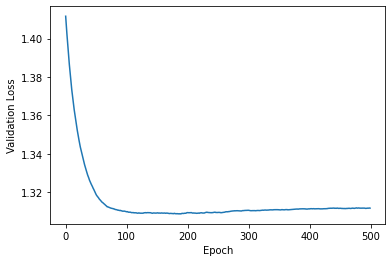

In [ ]:
plt.plot(train_history.history['val_loss'])
plt.xlabel("Epoch")
plt.ylabel("Validation Loss")

Text(0, 0.5, 'Validation Accuracy')

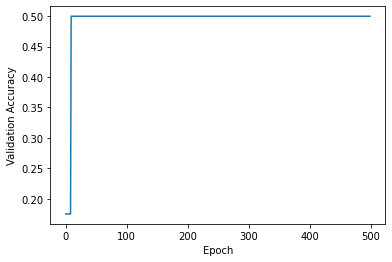

In [ ]:
plt.plot(train_history.history['val_acc'])
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")